In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Dataset/bottle-updated.csv')

# dataset.describe().transpose()
dataset

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.500,33.4400
1,1,8,10.460,33.4400
2,2,10,10.460,33.4370
3,3,19,10.450,33.4200
4,4,20,10.450,33.4210
...,...,...,...,...
864858,864858,0,18.744,33.4083
864859,864859,2,18.744,33.4083
864860,864860,5,18.692,33.4150
864861,864861,10,18.161,33.4062


In [ ]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
dataset.describe()

,Depthm,T_degC,Salnty
count,864863.000000,853900.000000,817509.000000
mean,226.831951,10.799677,33.840350
std,316.050259,4.243825,0.461843
min,0.000000,1.440000,28.431000
25%,46.000000,7.680000,33.488000
50%,125.000000,10.060000,33.863000
75%,300.000000,13.880000,34.196900
max,5351.000000,31.140000,37.034000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  864863 non-null  int64  
 1   T_degC  853900 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 19.8 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f1d2f6438>,
      dtype=object)

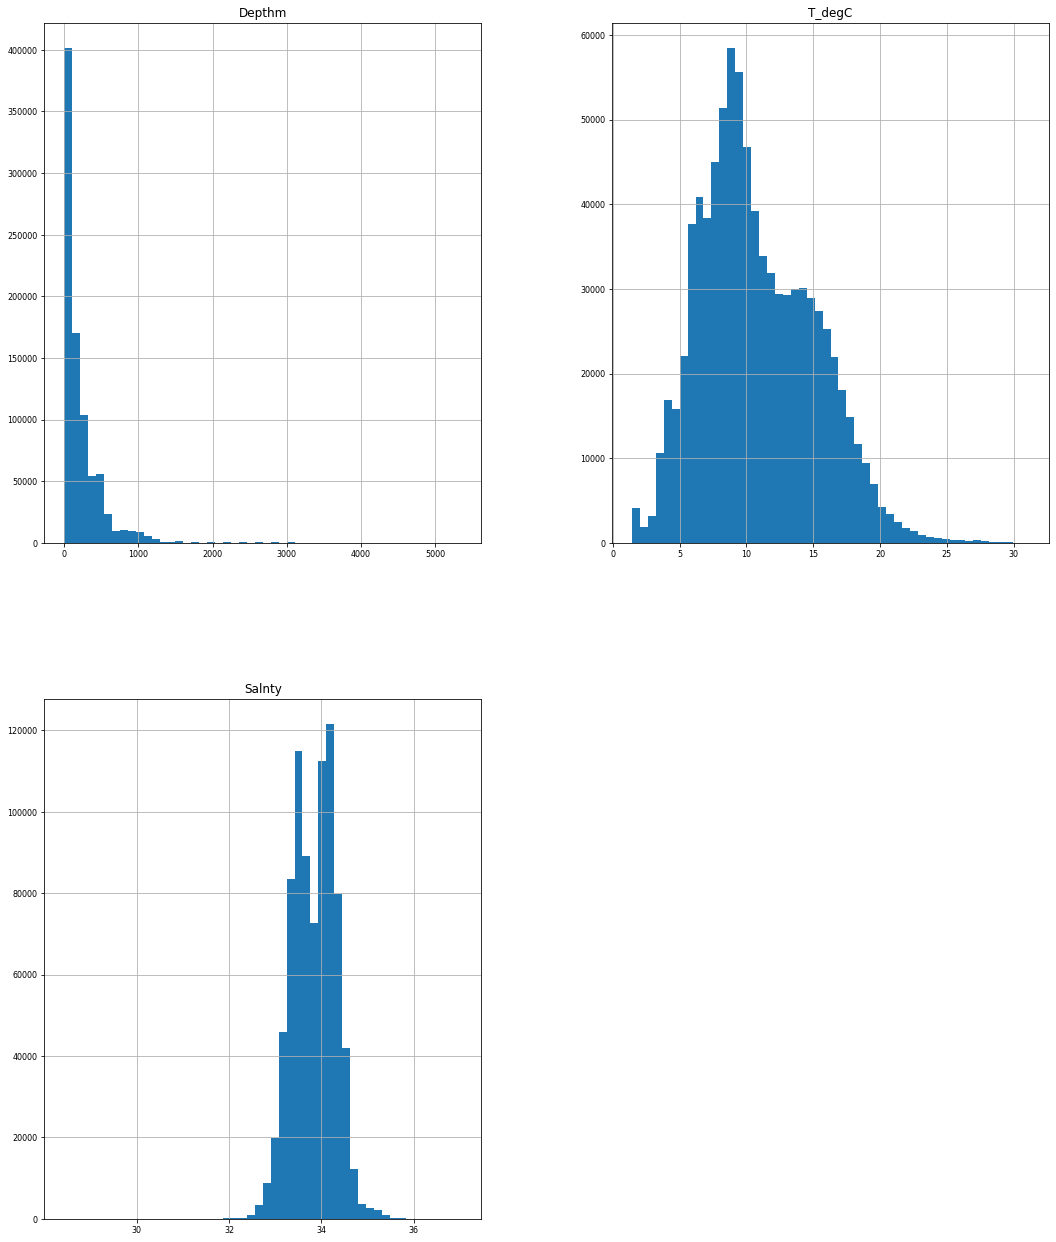

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
#dataCleaning
#replace nilai ? dengan none
dataset.replace("?", np.nan, inplace=True)

dataset.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [ ]:
dataset.isnull().sum().sort_values()

Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

ganti nilai nan dengan nilai rata-rata

In [ ]:
avg_T=dataset['T_degC'].mean(axis=0)
dataset['T_degC'].replace(np.nan, avg_T, inplace=True)


hapus nilai nan pada price 

In [ ]:
dataset.dropna(subset=["Salnty"], axis=0, inplace=True)
dataset.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
dtype: int64

In [ ]:
dataset.dtypes

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object

In [ ]:
corr = dataset.corr()

corr

,Depthm,T_degC,Salnty
Depthm,1.000000,-0.675604,0.57263
T_degC,-0.675604,1.000000,-0.50400
Salnty,0.572630,-0.504000,1.00000


In [ ]:
dataset.corr()['Salnty'][:-1]

Depthm    0.57263
T_degC   -0.50400
Name: Salnty, dtype: float64

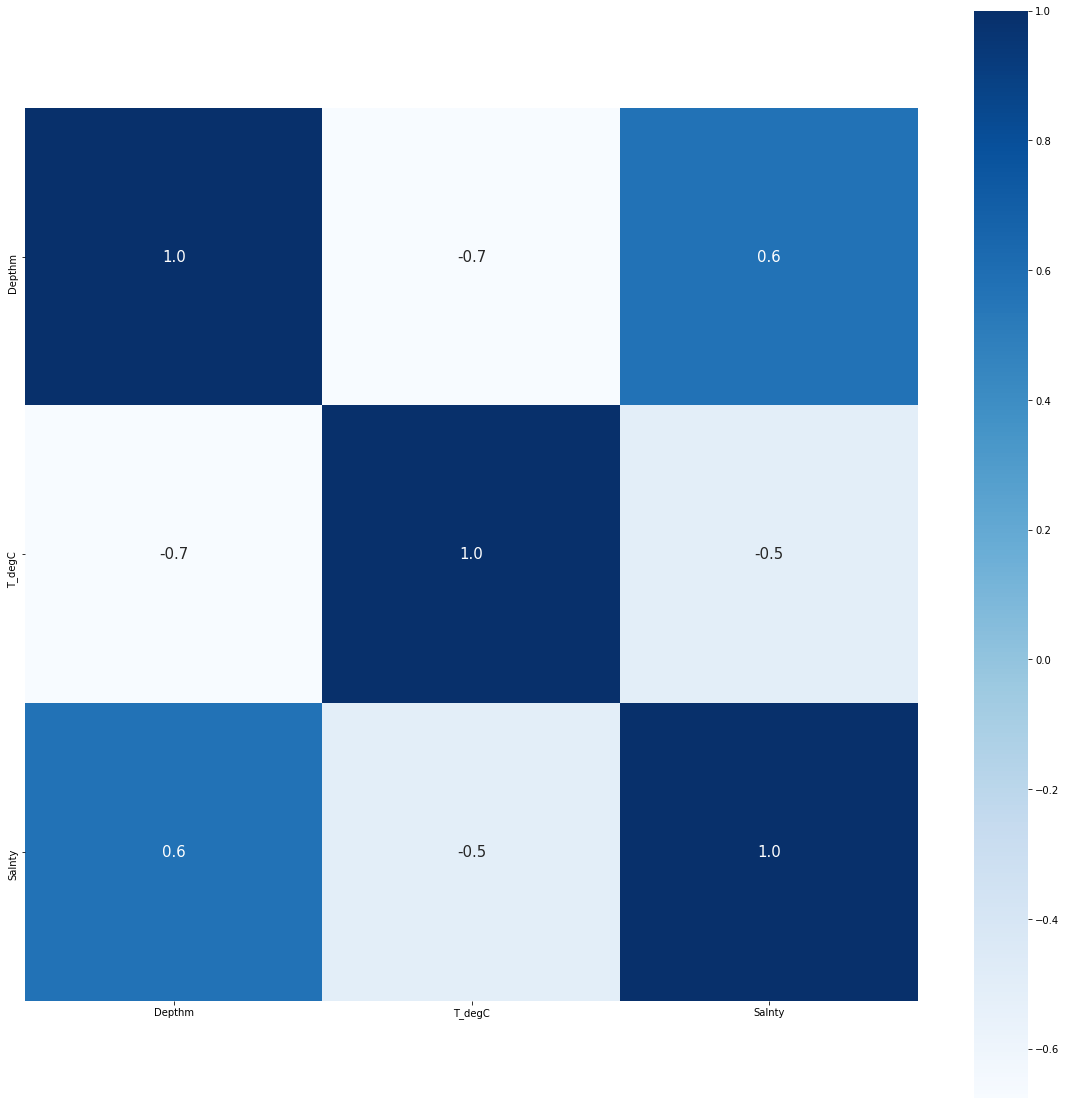

In [ ]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [ ]:
dataset

,Depthm,T_degC,Salnty
0,0,10.500,33.4400
1,8,10.460,33.4400
2,10,10.460,33.4370
3,19,10.450,33.4200
4,20,10.450,33.4210
...,...,...,...
864858,0,18.744,33.4083
864859,2,18.744,33.4083
864860,5,18.692,33.4150
864861,10,18.161,33.4062


## Linear Regression

### Feature Engineering

In [ ]:
label = dataset['Salnty']
features = dataset.drop(['Salnty'], axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

features = scaler.fit_transform(features.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.6428438575672536
MAE (Mean Absolute Error) 0.5598591960202743
r^2 score 0.35537847778712184
RMSE (Root Mean Squared Error 0.8017754408606275


### Deep Learning

In [ ]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu')) # 13 neuron, sesuai dengan 13 features
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history_deep = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
81751/81751 [==============================] - 68s 831us/step - loss: 0.3569 - val_loss: 0.3201
Epoch 2/50
81751/81751 [==============================] - 74s 903us/step - loss: 0.3267 - val_loss: 0.3206
Epoch 3/50
81751/81751 [==============================] - 56s 689us/step - loss: 0.3266 - val_loss: 0.3190
Epoch 4/50
81751/81751 [==============================] - 57s 702us/step - loss: 0.3264 - val_loss: 0.3204
Epoch 5/50
81751/81751 [==============================] - 59s 720us/step - loss: 0.3264 - val_loss: 0.3236
Epoch 6/50
81751/81751 [==============================] - 66s 812us/step - loss: 0.3263 - val_loss: 0.3233
Epoch 7/50
81751/81751 [==============================] - 63s 776us/step - loss: 0.3263 - val_loss: 0.3230
Epoch 8/50
81751/81751 [==============================] - 80s 981us/step - loss: 0.3262 - val_loss: 0.3196
Epoch 9/50
81751/81751 [==============================] - 80s 984us/step - loss: 0.3208 - val_loss: 0.3133
Epoch 10/50
81751/81751 [============

In [ ]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.3040531599206269
MAE (Mean Absolute Error) 0.35551248461755247
r^2 score 0.6951060378434666
RMSE (Root Mean Squared Error 0.5514101558011304


## Deeper Model

In [ ]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

history_deeper = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
81751/81751 [==============================] - 65s 795us/step - loss: 0.3183 - val_loss: 0.3006
Epoch 2/50
81751/81751 [==============================] - 77s 948us/step - loss: 0.3042 - val_loss: 0.3005
Epoch 3/50
81751/81751 [==============================] - 71s 863us/step - loss: 0.3027 - val_loss: 0.2956
Epoch 4/50
81751/81751 [==============================] - 70s 860us/step - loss: 0.3013 - val_loss: 0.2966
Epoch 5/50
81751/81751 [==============================] - 71s 872us/step - loss: 0.3001 - val_loss: 0.2945
Epoch 6/50
81751/81751 [==============================] - 64s 787us/step - loss: 0.2998 - val_loss: 0.3016
Epoch 7/50
81751/81751 [==============================] - 66s 807us/step - loss: 0.2994 - val_loss: 0.2962
Epoch 8/50
81751/81751 [==============================] - 68s 829us/step - loss: 0.2993 - val_loss: 0.2935
Epoch 9/50
81751/81751 [==============================] - 66s 803us/step - loss: 0.2992 - val_loss: 0.2941
Epoch 10/50
81751/81751 [============

In [ ]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.2936415761694785
MAE (Mean Absolute Error) 0.3477645853601745
r^2 score 0.705546412885255
RMSE (Root Mean Squared Error 0.5418870511181075


### Wider model

In [ ]:
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

wider_model.compile(loss='mean_squared_error', optimizer='adam')

history_wider = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=64)

Epoch 1/100
10219/10219 [==============================] - 8s 753us/step - loss: 0.3657 - val_loss: 0.3239
Epoch 2/100
10219/10219 [==============================] - 8s 766us/step - loss: 0.3264 - val_loss: 0.3236
Epoch 3/100
10219/10219 [==============================] - 7s 726us/step - loss: 0.3200 - val_loss: 0.3101
Epoch 4/100
10219/10219 [==============================] - 7s 719us/step - loss: 0.3135 - val_loss: 0.3081
Epoch 5/100
10219/10219 [==============================] - 9s 834us/step - loss: 0.3107 - val_loss: 0.3053
Epoch 6/100
10219/10219 [==============================] - 9s 892us/step - loss: 0.3097 - val_loss: 0.3065
Epoch 7/100
10219/10219 [==============================] - 10s 949us/step - loss: 0.3091 - val_loss: 0.3049
Epoch 8/100
10219/10219 [==============================] - 8s 748us/step - loss: 0.3089 - val_loss: 0.3044
Epoch 9/100
10219/10219 [==============================] - 7s 723us/step - loss: 0.3088 - val_loss: 0.3040
Epoch 10/100
10219/10219 [==========

In [ ]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.29375523665587555
MAE (Mean Absolute Error) 0.3493249328894734
r^2 score 0.7054324380920074
RMSE (Root Mean Squared Error 0.5419919156739107


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history_wider.history)
history_dataframe['epoch'] = history_wider.epoch
history_dataframe

,loss,val_loss,epoch
0,0.365666,0.323910,0
1,0.326360,0.323636,1
2,0.319954,0.310149,2
3,0.313480,0.308086,3
4,0.310692,0.305259,4
...,...,...,...
95,0.297843,0.293662,95
96,0.297779,0.295915,96
97,0.297835,0.293666,97
98,0.297754,0.293612,98


In [ ]:
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
70,0.297917,0.293062,70
89,0.297779,0.293078,89
94,0.297770,0.293096,94
81,0.297849,0.293187,81
72,0.297872,0.293209,72
...,...,...,...
5,0.309694,0.306520,5
3,0.313480,0.308086,3
2,0.319954,0.310149,2
1,0.326360,0.323636,1


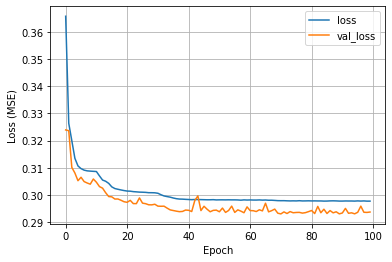

In [ ]:
plot_loss(history_wider)

In [ ]:
history_dataframe = pd.DataFrame(history_deep.history)
history_dataframe['epoch'] = history_deep.epoch
history_dataframe

,loss,val_loss,epoch
0,0.356909,0.320117,0
1,0.326700,0.320610,1
2,0.326566,0.319040,2
3,0.326371,0.320442,3
4,0.326400,0.323567,4
5,0.326280,0.323308,5
6,0.326346,0.323049,6
7,0.326235,0.319623,7
8,0.320765,0.313316,8
9,0.313435,0.308665,9


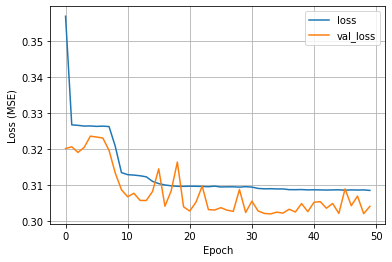

In [ ]:
plot_loss(history_deep) # epoch vs loss graph

In [ ]:
history_dataframe = pd.DataFrame(history_deeper.history)
history_dataframe['epoch'] = history_deeper.epoch
history_dataframe

,loss,val_loss,epoch
0,0.318330,0.300559,0
1,0.304160,0.300505,1
2,0.302679,0.295622,2
3,0.301258,0.296619,3
4,0.300096,0.294522,4
5,0.299819,0.301603,5
6,0.299388,0.296151,6
7,0.299316,0.293517,7
8,0.299186,0.294104,8
9,0.299145,0.295070,9


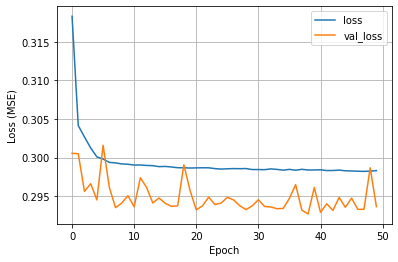

In [ ]:
plot_loss(history_deeper)

Untuk Bottle database saya masih menggunakan komposisi data training dan testing 80:20. Untuk batch_size saya ganti menjadi 64. Sebelumnya sudah saya running dengan batch_size 8, namun pada saat epochs 54, Runtime TPU nya limit, sehingga saya ulang dan mengganti batch_size nya agar lebih cepat.

LINEAR REGRESSION

r^2 score : 0.35537847778712184


RMSE : 0.8017754408606275

DEEP LEARNING

r^2 score : 0.6951060378434666


RMSE : 0.5514101558011304

DEEPER MODEL

r^2 score : 0.705546412885255


RMSE : 0.5418870511181075

WIDER MODEL

r^2 score : 0.7054324380920074


RMSE : 0.5419919156739107

Kesimpulan : nilai akurasi yang paling tinggi didapatkan pada Deeper model (70.55%) dan Wider model (70.54%) dan nilai rmse nya juga hampir sama 0.54